# [필수과제1]

- 정규분포와 비슷한 컬럼 추가
- df casual, cnt, [정규분포와 비슷한 추가컬럼] 통해서 - r2, rmse, 확인


---


- 정규분포와 비슷하지 않은 컬럼 추가
- df casual, cnt ,[정규분포와 비슷하지 않은 추가컬럼] 을 통해서 - r2, rmse, 확인

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('bike_sharing_daily.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,NaN,0.231700,0.483333,0.350754,364.0,1432.0,1796


In [3]:
df_bs = df.dropna()
df_bs

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88.0,1518.0,1606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,724,2012-12-24,1,1,12,0,1,1,2,0.231304,0.258900,0.791304,0.077230,174.0,746.0,920
724,725,2012-12-25,1,1,12,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440.0,573.0,1013
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341


<Axes: xlabel='cnt', ylabel='Density'>

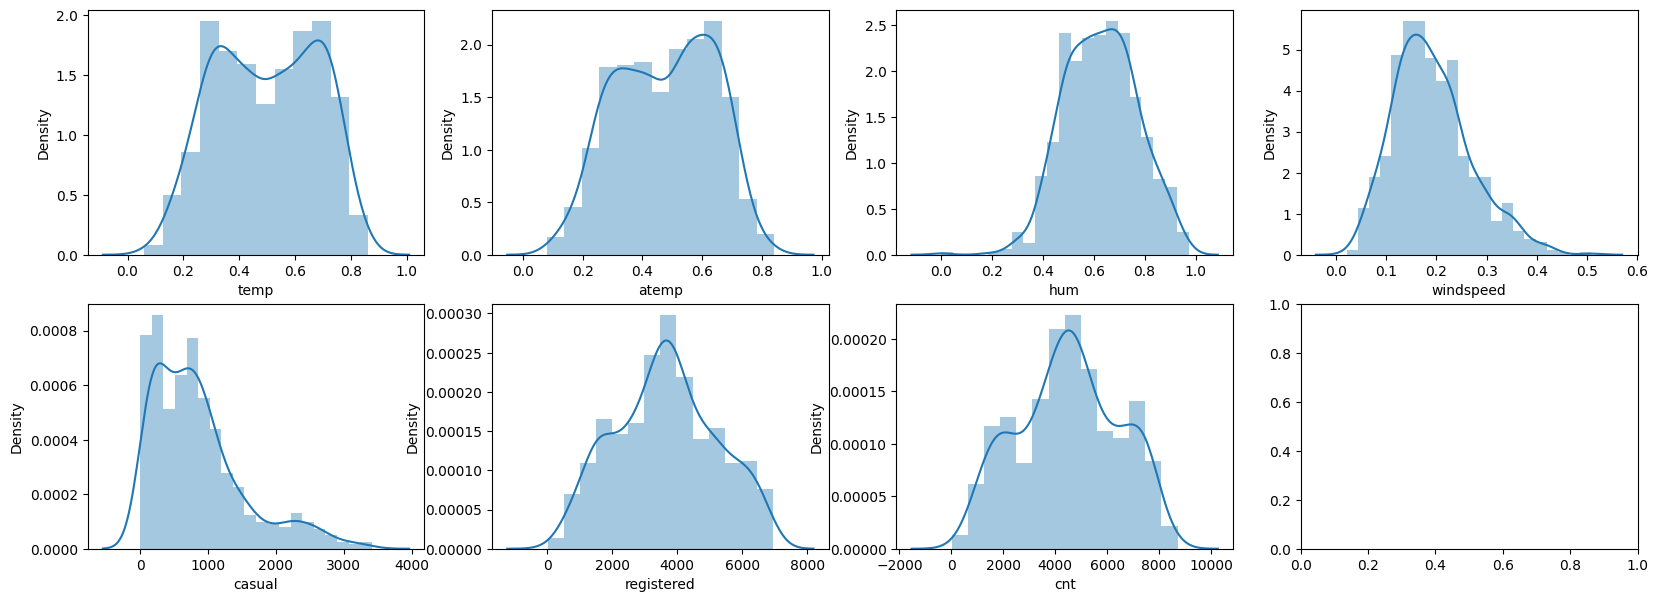

In [4]:
fig, axs = plt.subplots(2,4, figsize=(20,7))
sns.distplot(df['temp'], ax=axs[0, 0])
sns.distplot(df['atemp'], ax=axs[0, 1])
sns.distplot(df['hum'], ax=axs[0, 2])
sns.distplot(df['windspeed'], ax=axs[0, 3])
sns.distplot(df['casual'], ax=axs[1, 0])
sns.distplot(df['registered'], ax=axs[1, 1])
sns.distplot(df['cnt'], ax=axs[1, 2])

### 각 컬럼의 정규분포와 가까운 정도 확인

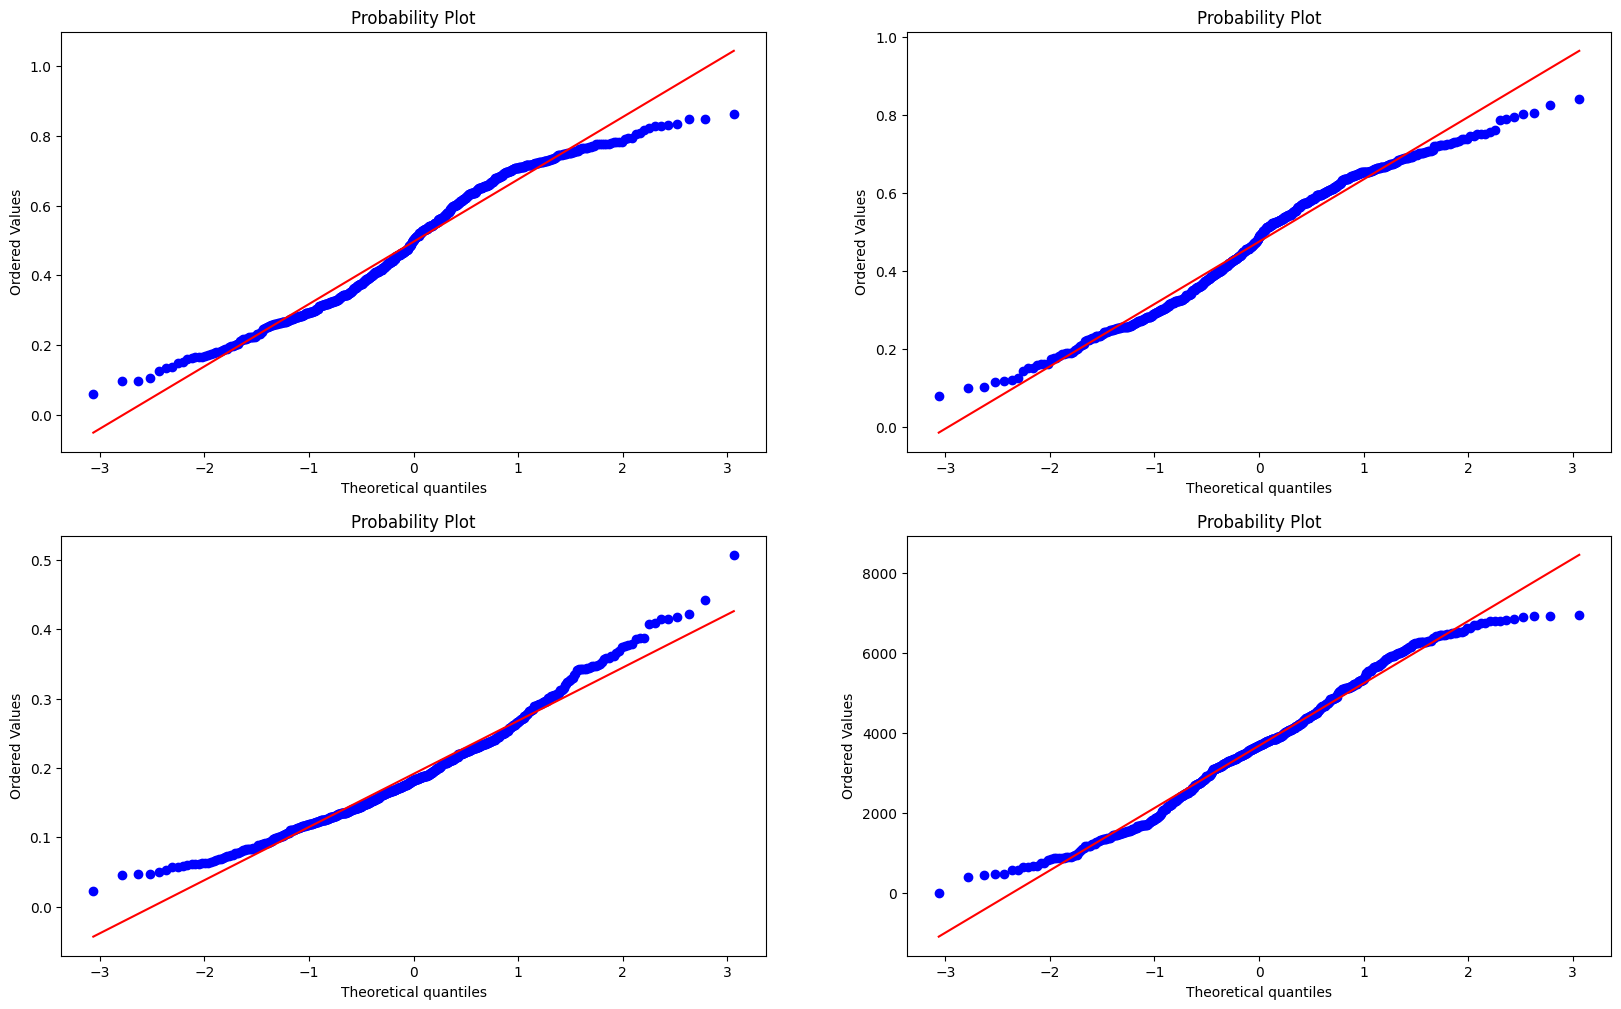

In [5]:
import scipy.stats as stats

fig, axs = plt.subplots(2, 2, figsize=(20, 12))
stats.probplot(df_bs['temp'], dist=stats.norm, plot=axs[0, 0])
stats.probplot(df_bs['atemp'], dist=stats.norm, plot=axs[0, 1])
stats.probplot(df_bs['windspeed'], dist=stats.norm, plot=axs[1, 0])
stats.probplot(df_bs['registered'], dist=stats.norm, plot=axs[1, 1])
plt.show()

In [6]:
from scipy.stats import shapiro

normal_columns = []
p_values = []

for column in ['temp', 'atemp', 'windspeed', 'registered']:
    # Shapiro 검정 수행
    stat, p = shapiro(df_bs[column])

    p_values.append(p)
    normal_columns.append(column)

# p-value 기준으로 정렬, 가장 정규 분포에 가까운 순서대로 정렬
sorted_columns = [col for _, col in sorted(zip(p_values, normal_columns))]

print("정규분포에 먼 순서대로 정렬된 컬럼\n->", sorted_columns)

정규분포에 먼 순서대로 정렬된 컬럼
-> ['temp', 'windspeed', 'atemp', 'registered']


가장 정규분포와 비슷한 컬럼: registered

cnt = casual + registered, 세 피처로 분석하면 정확도 100%로 뜰 확률있음
 (진짜 100%가 아닌 잘못된 분석)

-> 그 다음으로 정규분포와 비슷한 atemp로 진행

### atemp로 성능 확인

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

df_bs_1 = df[['casual','atemp','cnt']].dropna()
df_bs_1

,casual,atemp,cnt
0,331.0,0.363625,985
1,131.0,0.353739,801
3,108.0,0.212122,1562
4,82.0,0.229270,1600
5,88.0,0.233209,1606
...,...,...,...
725,9.0,0.220333,441
726,247.0,0.226642,2114
728,159.0,0.242400,1341
729,364.0,0.231700,1796


In [13]:
df_X = np.array(df_bs_1[['casual','atemp']])

X_train, X_test, y_train, y_test = train_test_split(df_X, df_bs_1['cnt'], test_size=0.3, random_state=111)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
rmse1 = sqrt(mean_squared_error(y_test, y_pred))
rmse1

1329.742797270041

In [15]:
df_bs_1.corr()

,casual,atemp,cnt
casual,1.000000,0.540798,0.670572
atemp,0.540798,1.000000,0.628340
cnt,0.670572,0.628340,1.000000


In [16]:
X_1 = sm.add_constant(df_X)

model_ols = sm.OLS(df_bs_1['cnt'], X_1).fit()
summary1 = model_ols.summary()
summary1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     423.2
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          7.11e-121
Time:                        05:43:03   Log-Likelihood:                -5983.3
No. Observations:                 697   AIC:                         1.197e+04
Df Residuals:                     694   BIC:                         1.199e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1284.7625    152.448      8.428      0.000     985.448    1584.077
x1             1.3105      0.085     15.433      0.000       1.144       1.477
x2          4438.7938    358.056     12.397      0.000    3735.791    5141.797
==============================================================================
Omnibus:                       32.578   Durbin-Watson:                   0.485
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.338
Skew:                           0.258   Prob(JB):                     6.32e-05
Kurtosis:                       2.368   Cond. No.                     8.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 정규분포와 비슷하지 않은 컬럼(temp)으로 성능 확인

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

df_bs_2=df[['casual','temp','cnt']].dropna()
df_bs_2

,casual,temp,cnt
0,331.0,0.344167,985
1,131.0,0.363478,801
2,120.0,0.196364,1349
3,108.0,0.200000,1562
4,82.0,0.226957,1600
...,...,...,...
725,9.0,0.243333,441
726,247.0,0.254167,2114
727,644.0,0.253333,3095
728,159.0,0.253333,1341


In [19]:
df_X = np.array(df_bs_2[['casual','temp']])

X_train, X_test, y_train, y_test = train_test_split(df_X, df_bs_2['cnt'], test_size=0.3, random_state=111)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [20]:
rmse2 = sqrt(mean_squared_error(y_test, y_pred))
rmse2

1295.6445285013363

In [21]:
df_bs_2.corr()

,casual,temp,cnt
casual,1.000000,0.539502,0.671737
temp,0.539502,1.000000,0.625058
cnt,0.671737,0.625058,1.000000


In [22]:
X_2 = sm.add_constant(df_X)

model_ols = sm.OLS(df_bs_2['cnt'], X_2).fit()
summary2 = model_ols.summary()
summary2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     425.9
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          8.78e-122
Time:                        05:43:40   Log-Likelihood:                -6046.1
No. Observations:                 704   AIC:                         1.210e+04
Df Residuals:                     701   BIC:                         1.211e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1422.3675    142.644      9.971      0.000    1142.308    1702.427
x1             1.3392      0.086     15.655      0.000       1.171       1.507
x2          3911.5957    318.216     12.292      0.000    3286.825    4536.367
==============================================================================
Omnibus:                       36.235   Durbin-Watson:                   0.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.512
Skew:                           0.280   Prob(JB):                     2.13e-05
Kurtosis:                       2.352   Cond. No.                     7.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---
### 비교

**RMSE** (0에 가까울수록 정확한 예측)

`1329.742797270041` - `1295.64`

**Corr** (1에 가까울수록 정확한 예측)

`0.628340` - `0.625058`

**R-squared** (1에 가까울수록 정확한 예측)

`0.549` - `0.549`

**-> 정규분포에 가까운 컬럼으로 분석하는 것이 더 예측 못함**

- 컬럼이 정규분포에 가까울수록 성능 높아지는 것 X
- 완전히 정규분포와는 먼 분포를 가진 피처가 아니라면 성능에 큰 영향 X